In [1]:
!pip install torch


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install numpy
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Read the raw data and save into a data frame.

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [6]:
df_ml = pd.DataFrame()
for x in range(10) : 
    df_chunk = pd.read_csv(f'event_frequency_dataset_{x}.csv',index_col=0)
    df_ml = pd.concat([df_ml,df_chunk])
df_ml

C:\Users\ashwi\AppData\Local\Temp\ipykernel_5532\337948094.py:3: DtypeWarning: Columns (7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_chunk = pd.read_csv(f'event_frequency_dataset_{x}.csv',index_col=0)


,Time,Channel 0,Channel 1,event_id,original_id,event,start_time,end_time,source,parquet_files
0,4310.00,0.021815,0.074526,2,9.0,meteor,2024-07-27 00:51:59,2024-07-27 00:52:01,AMS,E:/TDVS\2024-07-27(6789)\00-00(360)\data-2024-...
1,4310.01,0.021064,0.009177,2,9.0,meteor,2024-07-27 00:51:59,2024-07-27 00:52:01,AMS,E:/TDVS\2024-07-27(6789)\00-00(360)\data-2024-...
2,4310.02,0.020605,-0.009844,2,9.0,meteor,2024-07-27 00:51:59,2024-07-27 00:52:01,AMS,E:/TDVS\2024-07-27(6789)\00-00(360)\data-2024-...
3,4310.03,0.020775,-0.007408,2,9.0,meteor,2024-07-27 00:51:59,2024-07-27 00:52:01,AMS,E:/TDVS\2024-07-27(6789)\00-00(360)\data-2024-...
4,4310.04,0.020293,0.023452,2,9.0,meteor,2024-07-27 00:51:59,2024-07-27 00:52:01,AMS,E:/TDVS\2024-07-27(6789)\00-00(360)\data-2024-...
...,...,...,...,...,...,...,...,...,...,...
4770761,2009.96,-2.441657,-2.450518,4338,NaN,non_event,NaN,NaN,NaN,E:/TDVS\2024-08-19(8628)\00-00(348)\data-2024-...
4770762,2009.97,-2.441662,-2.450510,4338,NaN,non_event,NaN,NaN,NaN,E:/TDVS\2024-08-19(8628)\00-00(348)\data-2024-...
4770763,2009.98,-2.441656,-2.450504,4338,NaN,non_event,NaN,NaN,NaN,E:/TDVS\2024-08-19(8628)\00-00(348)\data-2024-...
4770764,2009.99,-2.441666,-2.450514,4338,NaN,non_event,NaN,NaN,NaN,E:/TDVS\2024-08-19(8628)\00-00(348)\data-2024-...


Extract the input and output values and use the label encoder to assign a value to each of the output categories. Then, split the data into test and train data sets.

In [7]:
# Extract features and labels
X = df_ml[['Channel 0', 'Channel 1']].values  # Features
y = df_ml['event'].values  # Categorical labels

# Encode labels (meteor=0, non_event=1, rocket=2)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (zero mean, unit variance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create PyTorch DataLoaders
batch_size = 2048
train_dataset = data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = data.TensorDataset(X_test_tensor, y_test_tensor)
train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Define the Multi-Layer Perceptron model.

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 3)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x



Train the MLP model for 20 epochs and guage the loss at each step.

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#model = LogisticRegressionModel().to(device)
model = MLP().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss / len(train_loader):.4f}")

print("Training complete!")


Epoch [1/20], Loss: 0.8572
Epoch [2/20], Loss: 0.8033
Epoch [3/20], Loss: 0.7762
Epoch [4/20], Loss: 0.7564
Epoch [5/20], Loss: 0.7409
Epoch [6/20], Loss: 0.7308
Epoch [7/20], Loss: 0.7230
Epoch [8/20], Loss: 0.7171
Epoch [9/20], Loss: 0.7119
Epoch [10/20], Loss: 0.7070
Epoch [11/20], Loss: 0.7023
Epoch [12/20], Loss: 0.6975
Epoch [13/20], Loss: 0.6928
Epoch [14/20], Loss: 0.6884
Epoch [15/20], Loss: 0.6842
Epoch [16/20], Loss: 0.6805
Epoch [17/20], Loss: 0.6770
Epoch [18/20], Loss: 0.6739
Epoch [19/20], Loss: 0.6710
Epoch [20/20], Loss: 0.6684
Training complete!


Evaluate the model's accuracy.

In [12]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 74.82%


Repeat the model training but make sure that rows with the same id are not found in both the test and train data sets (Improves the reliability of the model).

In [15]:
# Get unique event_ids
unique_event_ids = df_ml['event_id'].unique()

# Split event_ids into train and test (80-20 split)
train_ids, test_ids = train_test_split(unique_event_ids, test_size=0.2, random_state=42)

# Assign rows based on event_id
train_df = df_ml[df_ml['event_id'].isin(train_ids)]
test_df = df_ml[df_ml['event_id'].isin(test_ids)]

# Extract features and labels
X_train = train_df[['Channel 0', 'Channel 1']].values
y_train = train_df['event'].values
X_test = test_df[['Channel 0', 'Channel 1']].values
y_test = test_df['event'].values

# Encode labels (meteor=0, non_event=1, rocket=2)
label_mapping = {'meteor': 0, 'non_event': 1, 'rocket': 2}
y_train = np.array([label_mapping[label] for label in y_train])
y_test = np.array([label_mapping[label] for label in y_test])

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create PyTorch DataLoaders
batch_size = 2048
train_dataset = data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = data.TensorDataset(X_test_tensor, y_test_tensor)
train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Verify correct split
print(f"Train set size: {len(train_df)}, Test set size: {len(test_df)}")
print(f"Unique event_ids in Train: {len(set(train_df['event_id']))}")
print(f"Unique event_ids in Test: {len(set(test_df['event_id']))}")
print(f"Train & Test Overlap: {len(set(train_df['event_id']) & set(test_df['event_id']))}")  # Should be 0


Train set size: 4018014, Test set size: 752752
Unique event_ids in Train: 2640
Unique event_ids in Test: 660
Train & Test Overlap: 0


In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#model = LogisticRegressionModel().to(device)
model = MLP().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 30
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss / len(train_loader):.4f}")

print("Training complete!")

Epoch [1/30], Loss: 0.8944
Epoch [2/30], Loss: 0.8382
Epoch [3/30], Loss: 0.8126
Epoch [4/30], Loss: 0.7938
Epoch [5/30], Loss: 0.7786
Epoch [6/30], Loss: 0.7660
Epoch [7/30], Loss: 0.7564
Epoch [8/30], Loss: 0.7477
Epoch [9/30], Loss: 0.7397
Epoch [10/30], Loss: 0.7334
Epoch [11/30], Loss: 0.7277
Epoch [12/30], Loss: 0.7223
Epoch [13/30], Loss: 0.7175
Epoch [14/30], Loss: 0.7130
Epoch [15/30], Loss: 0.7087
Epoch [16/30], Loss: 0.7045
Epoch [17/30], Loss: 0.7005
Epoch [18/30], Loss: 0.6965
Epoch [19/30], Loss: 0.6927
Epoch [20/30], Loss: 0.6890
Epoch [21/30], Loss: 0.6854
Epoch [22/30], Loss: 0.6821
Epoch [23/30], Loss: 0.6789
Epoch [24/30], Loss: 0.6759
Epoch [25/30], Loss: 0.6731
Epoch [26/30], Loss: 0.6705
Epoch [27/30], Loss: 0.6680
Epoch [28/30], Loss: 0.6656
Epoch [29/30], Loss: 0.6634
Epoch [30/30], Loss: 0.6612
Training complete!


In [18]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 73.40%


For the more robust model (no id overlap), create a heatmap showing the prediction accuracy for each category.

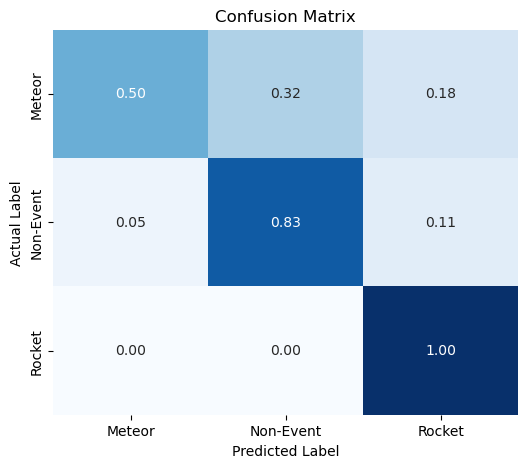

In [21]:
# Assuming you have your trained MLP model and test loader
model.eval()
with torch.no_grad():
    predictions = []
    true_labels = []
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        predictions.extend(predicted.cpu().numpy())  # Store predictions
        true_labels.extend(labels.cpu().numpy())  # Store true labels
        
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions, normalize='true')

# Make sure the confusion matrix is 3x3 (since there are 3 classes)
assert cm.shape == (3, 3), "Confusion matrix is not 3x3!"

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Meteor', 'Non-Event', 'Rocket'], yticklabels=['Meteor', 'Non-Event', 'Rocket'], cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()